# Analysis of LPBF Parameters for 316L Stainless Steel and Ti-6Al-4V

## Introduction

This Jupyter notebook presents an analysis of Laser Powder Bed Fusion (LPBF) parameters for two materials: 316L stainless steel and Ti-6Al-4V. Our experiment explores various melting regimes by systematically varying laser power and scanning speed across different cuboid samples.

### Experiment Overview:

1. **Materials**: 
   - 316L stainless steel (gas-atomized powder, D₉₀ = 52 μm)
   - Ti-6Al-4V Grade 23 (gas-atomized powder, D₉₀ = 47 μm)

2. **Sample Design**:
   - Cuboid samples 
   - 20 sets of 10 unidirectional lines per cuboid
   - 80 μm layer thickness, 100 μm hatching distance

3. **Parameter Range**:
   - Laser Power: 90W to 120W
   - Scanning Speed: 300 to 1800 mm/s

4. **Cuboid Sets**:
   - A & B, C & D: Varying power and speed
   - E & F: Fixed power (105W), varying speed

5. **Randomization**:
   - Parameters applied in random order to mitigate position bias and prevent pattern detection

### Code Overview:

This notebook processes and visualizes the experimental data:

1. Load experiment parameters from an Excel file
2. Create scatter plots of laser speed vs. power for each cuboid pair
3. Generate a comprehensive PDF figure showing all parameter distributions

The resulting visualizations will help us understand the parameter space explored in our experiment and serve as a foundation for further analysis of melting regimes in LPBF processes.

Let's begin by examining the code and its outputs.

In [1]:
import pandas as pd

# Load the Excel file
excel_path = './experiment_parameters.xlsx'
xl = pd.ExcelFile(excel_path)

# List all the sheet names to see the cubes
sheet_names = xl.sheet_names
sheet_names


['Cube1',
 'Cube2',
 'Cube3',
 'Cube4',
 'Cube5',
 'Cube6',
 'Cube7',
 'Cube8',
 'Cube9']

In [2]:
# Load all sheets into a dictionary of dataframes
cubes_data = {sheet: xl.parse(sheet) for sheet in sheet_names}

# Inspect the first few rows of each sheet to understand the structure and content
for cube, data in cubes_data.items():
    print(f"{cube}:")
    print(data.head(), "\n")


Cube1:
   Speed (mm/s)  Power (W)  Power perc (%)  #
0          1050         90              18  1
1           800         90              18  2
2          1800        120              24  3
3          1300        120              24  4
4           550        120              24  5 

Cube2:
   Speed (mm/s)  Power (W)  Power perc (%)   #
0           800        105              21  11
1           300        120              24  12
2          1300        105              21  13
3          1050        120              24  14
4           300        105              21  15 

Cube3:
   Speed (mm/s)  Power (W)  Power perc (%)  #
0          1550         90              18  1
1          1300        120              24  2
2          1050         90              18  3
3           300        120              24  4
4           550        120              24  5 

Cube4:
   Speed (mm/s)  Power (W)  Power perc (%)   #
0           800        105              21  11
1           800        120            

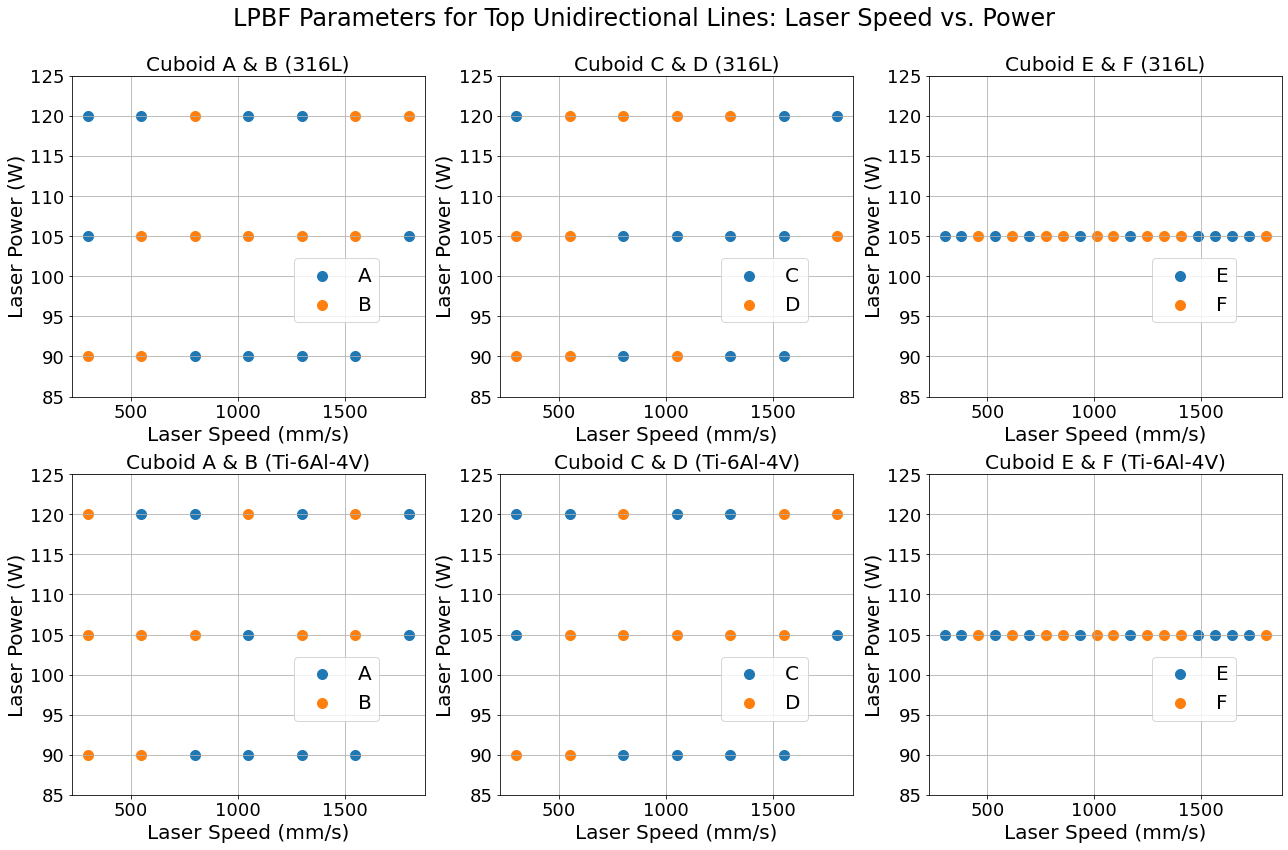

In [3]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Create 'Figures' directory if it doesn't exist
os.makedirs('Figures', exist_ok=True)

# Define pairs of cubes to be considered together for each material
cube_pairs_316L = {
  'Cuboid A & B': ['Cube3', 'Cube4'],
  'Cuboid C & D': ['Cube5', 'Cube6'],
  'Cuboid E & F': ['Cube7', 'Cube8']
}

cube_pairs_Ti64 = {
  'Cuboid A & B': ['Cube1', 'Cube2'],
  'Cuboid C & D': ['Cube3', 'Cube4'],
  'Cuboid E & F': ['Cube7', 'Cube8']
}

# Function to create plot for each material
def create_plot(cube_pairs, material_name, axes):
    for ax, (title, cubes) in zip(axes, cube_pairs.items()):
        for i, cube in enumerate(cubes):
            data = cubes_data[cube]  
            label = title.split('&')[i].strip()[-1] 
            ax.scatter(data['Speed (mm/s)'], data['Power (W)'], label=label, s=100)
        ax.set_title(f'{title} ({material_name})', fontsize=20)  
        ax.set_xlabel('Laser Speed (mm/s)', fontsize=20)  
        ax.set_ylabel('Laser Power (W)', fontsize=20)  
        ax.legend(fontsize=20, loc='lower right', bbox_to_anchor=(0.9, 0.2))  
        ax.set_ylim(85, 125)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=18)  

# Create a single figure with all plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('LPBF Parameters for Top Unidirectional Lines: Laser Speed vs. Power', fontsize=24)  

# Create plots for both materials
create_plot(cube_pairs_316L, '316L', axes[0])
create_plot(cube_pairs_Ti64, 'Ti-6Al-4V', axes[1])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust for main title

# Save the figure as PDF
with PdfPages('Figures/LPBF_parameters.pdf') as pdf:
    pdf.savefig(fig)

#plt.close()